# Fact finder - a Fact Search Engine  - Neural Models
Information Retrieval **Project** - *A.Y. 2023/24*

**Team**:
*   **Mattia Piazzalunga** - 851931
*   **Nicolò Urbani** - 856213

**Beanchmark datasets**:

*   **FEVER dataset** - CHIII et al.

## Global Variables and Functions

In [ ]:
index_path = "/kaggle/working/indices/indices/beir_fever"
index_path2 = "/kaggle/working/indices/indices2/beir_fever"
model_path = "/kaggle/working/indices/models"

## Import Libraries

In [ ]:
!pip install python-terrier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 919.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ | done
  Preparing metadata (pyproject.toml) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.2/335.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.

In [ ]:
!apt-get install -y openjdk-17-jdk-headless -qq > /dev/null

In [ ]:
import os

#JAVA_HOME
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"


In [ ]:
import pyterrier as pt
pt.init(tqdm='notebook')

terrier-assemblies 5.8 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.10.0 has loaded Terrier 5.8 (built by craigm on 2023-11-01 18:05) and terrier-helper 0.0.8

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.


In [ ]:
!pip install --upgrade -q git+https://github.com/Georgetown-IR-Lab/OpenNIR

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.11.0 requires botocore<1.34.23,>=1.33.2, but you have botocore 1.29.165 which is incompatible.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [ ]:

## Pyterries
import pyterrier as pt
from pyterrier.measures import *
from sklearn.ensemble import RandomForestRegressor

#Reranking
import onir_pt

#Graph
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict


#Wordcloud
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Import dataset

In [ ]:
#Train
dataset_train = pt.get_dataset('irds:beir/fever/train')

#Validation
dataset_validation = pt.get_dataset('irds:beir/fever/dev')

#Test
dataset_test = pt.get_dataset('irds:beir/fever/test')

In [ ]:
#Train
queries_train = dataset_train.get_topics(variant = "text")

#Validation
queries_validation =  dataset_validation.get_topics(variant = "text")

#Test
queries_test = dataset_test.get_topics(variant = "text")

[INFO] [starting] opening zip file
[INFO] If you have a local copy of https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/fever.zip, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/5a818580227bfb4b35bb6fa46d9b6c03
[INFO] [starting] https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/fever.zip
[INFO] [finished] https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/fever.zip: [50.50s] [1.24GB] [24.5MB/s]
[INFO] [finished] opening zip file [51.68s]
[INFO] [starting] opening zip file
[INFO] [finished] opening zip file s]
[INFO] [starting] opening zip file
[INFO] [finished] opening zip file s]
[INFO] [starting] opening zip file
[INFO] [finished] opening zip file s]


## Index for Neural Models

In [ ]:
if not os.path.exists(index_path2 + "/data.properties"):
    indexer = pt.index.IterDictIndexer(index_path2, stopwords=None, meta={"docno": 221})


    index_ref = indexer.index(dataset_train.get_corpus_iter(),
                              fields=['text'])

else:
    index_ref = pt.IndexRef.of(index_path2 + "/data.properties")

index = pt.IndexFactory.of(index_ref)

print(f"Index statistics:\n{index.getCollectionStatistics().toString()}")

[INFO] [starting] building docstore
[INFO] [starting] opening zip file
[INFO] [finished] opening zip file s]
docs_iter: 100%|████████████████████| 5416568/5416568 [03:02<0ms, 29731.00doc/s]
[INFO] [finished] docs_iter: [03:02] [5416568doc] [29730.63doc/s]
[INFO] [finished] building docstore [03:02]


beir/fever/train documents:   0%|          | 0/5416568 s<?, ?it/s]

04:33:58.979 [ForkJoinPool-1-worker-1] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (1941_in_paleontology) - further warnings are suppressed
05:03:50.787 [ForkJoinPool-1-worker-1] WARN org.terrier.structures.indexing.Indexer - Indexed 20476 empty documents
Index statistics:
Number of documents: 5416568
Number of terms: 2471392
Number of postings: 284943850
Number of fields: 1
Number of tokens: 453148161
Field names: [text]
Positions:   false



## Explorative Analysis

### Documents Collection Word Cloud

In [ ]:
terms = []
frequencies = []

for term, le in index.getLexicon():
    terms.append(term)
    frequencies.append(le.getFrequency())

# Create a dictionary from the terms and frequencies
word_freq = {term: freq for term, freq in zip(terms, frequencies)}

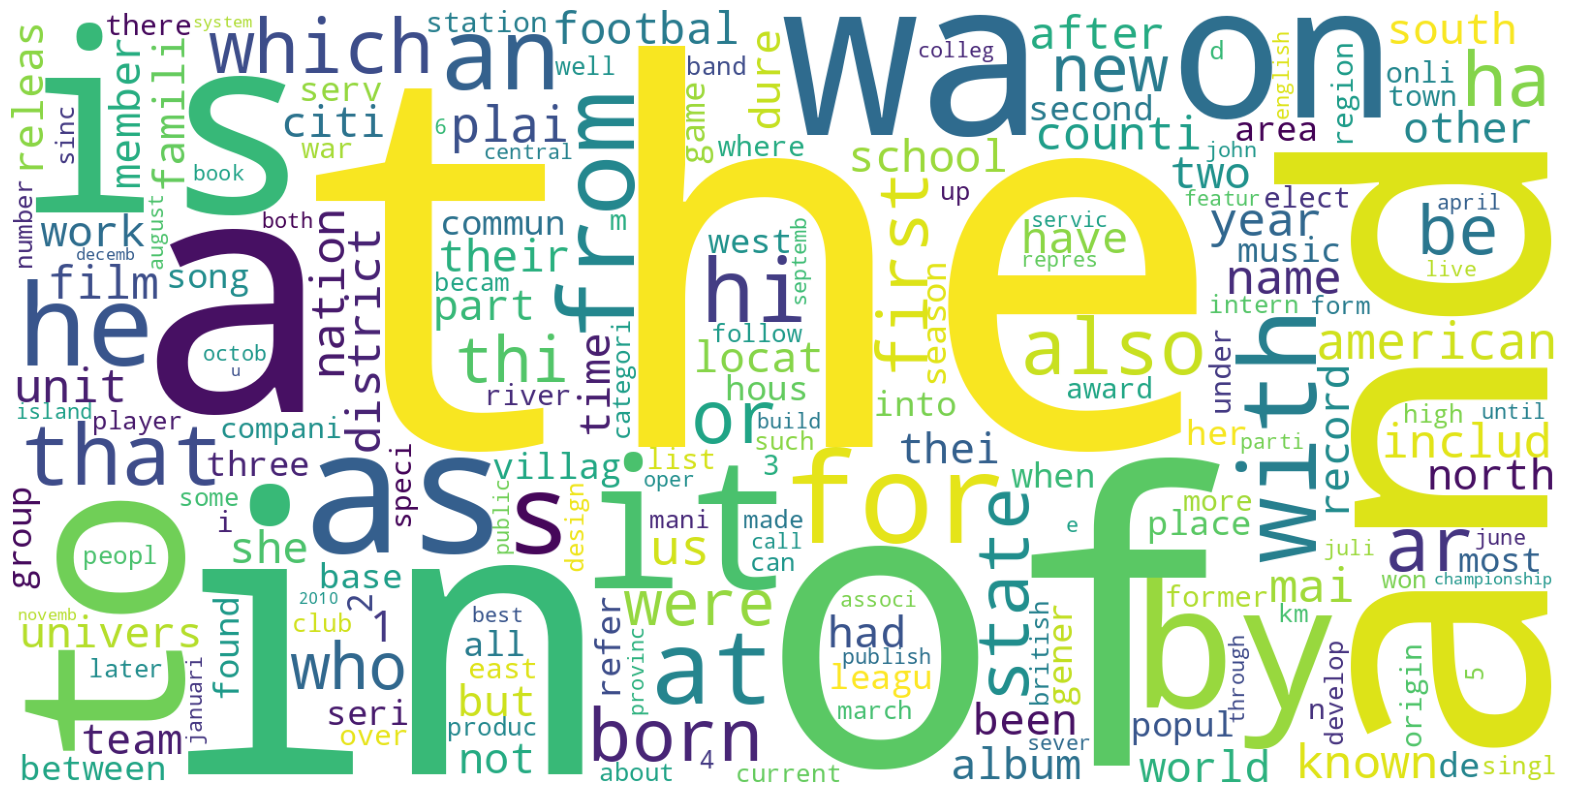

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color ='white').generate_from_frequencies(word_freq)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(20,14))
plt.imshow(wordcloud, interpolation='antialiased')
plt.axis('off')
plt.show()

###Word Frequency in Document Collection

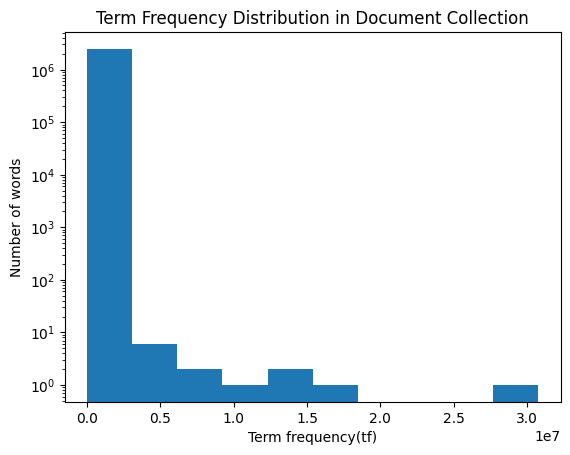

In [ ]:
plt.hist(frequencies,log=True)
plt.xlabel("Term frequency(tf)")
plt.ylabel("Number of words")
plt.title("Term Frequency Distribution in Document Collection")
plt.show()

## Neural Re-Ranker

In [ ]:
bm25_model_tuned = pt.BatchRetrieve(index_ref, wmodel="BM25",
                                   controls={"bm25.b" : 0.5, "bm25.k_1": 0.3, "bm25.k_3": 20})

### KNRM

In [ ]:
#Re-rank with knrm
knrm = onir_pt.reranker('knrm', 'wordvec_hash', text_field='text')

config file not found: config
[2024-02-21 05:06:15,886][WordvecHashVocab][DEBUG] [starting] downloading https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip


[2024-02-21 05:06:20,775][onir.util.download][WARNING] no hash provided for https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip; consider adding expected_md5="3cc8839ac3fa9a6187149b1e73328b2a" to ensure data integrity.


[2024-02-21 05:06:20,782][onir.util.download][DEBUG] downloaded https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip [4.56s] [682M] [151MB/s]


[2024-02-21 05:06:20,792][WordvecHashVocab][DEBUG] [finished] downloading https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip [4.91s]
[2024-02-21 05:06:20,794][WordvecHashVocab][DEBUG] [starting] extracting vecs
[2024-02-21 05:06:32,730][WordvecHashVocab][DEBUG] [finished] extracting vecs [11.94s]
[2024-02-21 05:06:32,732][WordvecHashVocab][DEBUG] [starting] loading vecs into memory
[2024-02-21 05:09:00,678][WordvecHashVocab][DEBUG] [finished] loading vecs into memory [02:28]
[2024-02-21 05:09:01,165][WordvecHashVocab][DEBUG] [starting] writing cached at /root/data/onir/vocab/wordvec_hash/fasttext-wiki-news-300d-1M.p
[2024-02-21 05:09:05,273][WordvecHashVocab][DEBUG] [finished] writing cached at /root/data/onir/vocab/wordvec_hash/fasttext-wiki-news-300d-1M.p [4.11s]


In [ ]:
pipeline_re_rank_knrm = (
    bm25_model_tuned % 50
    >> pt.text.get_text(dataset_train, 'text')
    >> pt.apply.generic(lambda df: df.dropna())
    >> knrm
)

In [ ]:
pt.Experiment(
    [pipeline_re_rank_knrm],
    dataset_test.get_topics(),
    dataset_test.get_qrels(),
    [P@5, P@10, R@5, R@10, 'map', nDCG@20, 'ndcg', 'recip_rank'],
    names=[ "Re-rank with knrm"],
    batch_size=264,
    verbose=True
)

pt.Experiment:   0%|          | 0/26 s<?, ?batches/s]

[2024-02-21 05:13:59,098][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:13:59,765][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3181 s<?, ?it/s]

[2024-02-21 05:14:09,009][onir_pt][DEBUG] [finished] batches: [9.24s] [3181it] [344.23it/s]
[2024-02-21 05:18:24,454][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:18:24,459][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3153 s<?, ?it/s]

[2024-02-21 05:18:32,639][onir_pt][DEBUG] [finished] batches: [8.18s] [3153it] [385.55it/s]
[2024-02-21 05:23:03,934][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:23:03,938][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3159 s<?, ?it/s]

[2024-02-21 05:23:12,053][onir_pt][DEBUG] [finished] batches: [8.11s] [3159it] [389.36it/s]
[2024-02-21 05:27:34,780][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:27:34,783][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3204 s<?, ?it/s]

[2024-02-21 05:27:43,105][onir_pt][DEBUG] [finished] batches: [8.32s] [3204it] [385.16it/s]
[2024-02-21 05:31:56,806][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:31:56,810][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3191 s<?, ?it/s]

[2024-02-21 05:32:04,914][onir_pt][DEBUG] [finished] batches: [8.10s] [3191it] [393.96it/s]
[2024-02-21 05:36:34,170][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:36:34,174][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3159 s<?, ?it/s]

[2024-02-21 05:36:42,397][onir_pt][DEBUG] [finished] batches: [8.22s] [3159it] [384.29it/s]
[2024-02-21 05:41:01,890][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:41:01,894][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3184 s<?, ?it/s]

[2024-02-21 05:41:10,045][onir_pt][DEBUG] [finished] batches: [8.15s] [3184it] [390.74it/s]
[2024-02-21 05:45:21,374][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:45:21,379][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3165 s<?, ?it/s]

[2024-02-21 05:45:29,656][onir_pt][DEBUG] [finished] batches: [8.27s] [3165it] [382.55it/s]
[2024-02-21 05:49:44,646][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:49:44,651][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3161 s<?, ?it/s]

[2024-02-21 05:49:52,975][onir_pt][DEBUG] [finished] batches: [8.32s] [3161it] [379.86it/s]
[2024-02-21 05:54:06,412][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:54:06,416][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3176 s<?, ?it/s]

[2024-02-21 05:54:14,537][onir_pt][DEBUG] [finished] batches: [8.12s] [3176it] [391.20it/s]
[2024-02-21 05:58:34,359][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 05:58:34,363][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3176 s<?, ?it/s]

[2024-02-21 05:58:42,366][onir_pt][DEBUG] [finished] batches: [8.00s] [3176it] [396.95it/s]
[2024-02-21 06:03:10,149][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:03:10,153][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3164 s<?, ?it/s]

[2024-02-21 06:03:18,252][onir_pt][DEBUG] [finished] batches: [8.10s] [3164it] [390.81it/s]
[2024-02-21 06:07:29,192][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:07:29,196][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3162 s<?, ?it/s]

[2024-02-21 06:07:37,420][onir_pt][DEBUG] [finished] batches: [8.22s] [3162it] [384.63it/s]
[2024-02-21 06:11:49,150][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:11:49,154][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3169 s<?, ?it/s]

[2024-02-21 06:11:57,363][onir_pt][DEBUG] [finished] batches: [8.21s] [3169it] [386.15it/s]
[2024-02-21 06:16:13,387][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:16:13,392][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3161 s<?, ?it/s]

[2024-02-21 06:16:21,888][onir_pt][DEBUG] [finished] batches: [8.49s] [3161it] [372.14it/s]
[2024-02-21 06:20:21,611][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:20:21,615][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3158 s<?, ?it/s]

[2024-02-21 06:20:29,848][onir_pt][DEBUG] [finished] batches: [8.23s] [3158it] [383.68it/s]
[2024-02-21 06:24:40,571][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:24:40,575][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3155 s<?, ?it/s]

[2024-02-21 06:24:48,671][onir_pt][DEBUG] [finished] batches: [8.09s] [3155it] [389.79it/s]
[2024-02-21 06:29:02,013][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:29:02,017][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3203 s<?, ?it/s]

[2024-02-21 06:29:10,161][onir_pt][DEBUG] [finished] batches: [8.14s] [3203it] [393.41it/s]
[2024-02-21 06:33:14,625][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:33:14,628][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3179 s<?, ?it/s]

[2024-02-21 06:33:22,825][onir_pt][DEBUG] [finished] batches: [8.19s] [3179it] [387.93it/s]
[2024-02-21 06:37:35,156][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:37:35,161][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3143 s<?, ?it/s]

[2024-02-21 06:37:43,487][onir_pt][DEBUG] [finished] batches: [8.32s] [3143it] [377.65it/s]
[2024-02-21 06:41:52,011][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:41:52,015][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3185 s<?, ?it/s]

[2024-02-21 06:42:00,098][onir_pt][DEBUG] [finished] batches: [8.08s] [3185it] [394.19it/s]
[2024-02-21 06:46:07,088][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:46:07,092][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3164 s<?, ?it/s]

[2024-02-21 06:46:15,249][onir_pt][DEBUG] [finished] batches: [8.15s] [3164it] [388.00it/s]
[2024-02-21 06:50:30,413][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:50:30,417][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3157 s<?, ?it/s]

[2024-02-21 06:50:38,682][onir_pt][DEBUG] [finished] batches: [8.26s] [3157it] [382.08it/s]
[2024-02-21 06:54:57,016][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:54:57,020][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3196 s<?, ?it/s]

[2024-02-21 06:55:05,295][onir_pt][DEBUG] [finished] batches: [8.27s] [3196it] [386.32it/s]
[2024-02-21 06:59:02,590][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 06:59:02,594][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/3176 s<?, ?it/s]

[2024-02-21 06:59:10,614][onir_pt][DEBUG] [finished] batches: [8.02s] [3176it] [396.13it/s]
[2024-02-21 07:00:09,296][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 07:00:09,300][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/800 s<?, ?it/s]

[2024-02-21 07:00:11,394][onir_pt][DEBUG] [finished] batches: [2.09s] [800it] [382.52it/s]


,name,P@5,P@10,R@5,R@10,map,nDCG@20,ndcg,recip_rank
0,Re-rank with knrm,0.006421,0.006436,0.02795,0.055903,0.037465,0.039818,0.174584,0.039987


In [ ]:
pipeline_re_rank_knrm.search('Firefox is a computer game')

[2024-02-21 07:00:12,961][onir_pt][DEBUG] using GPU (deterministic)
[2024-02-21 07:00:12,965][onir_pt][DEBUG] [starting] batches


batches:   0%|          | 0/13 s<?, ?it/s]

[2024-02-21 07:00:13,012][onir_pt][DEBUG] [finished] batches: s] [13it] [291.91it/s]


,qid,docid,docno,rank,score,query,text
0,1,4212581,River_Trail_(JavaScript_engine),0,-6.700102,Firefox is a computer game,River Trail ( also known as Parallel JavaScrip...
1,1,1696167,FF2,1,-6.992773,Firefox is a computer game,"FF2 may refer to : Final Fantasy II , a 1988 ..."
2,1,1637797,FF3,2,-6.660470,Firefox is a computer game,FF3 may refer to : Mozilla Firefox 3 Fatal F...
3,1,3816930,PlayCanvas,3,-8.257060,Firefox is a computer game,PlayCanvas is an open source 3D game engine/in...
4,1,3455306,MojoPac,4,-8.328350,Firefox is a computer game,MojoPac was an application virtualization prod...
5,1,1661512,Firefox_Portable,5,-9.664987,Firefox is a computer game,"Mozilla Firefox , Portable Edition ( formerly ..."
6,1,4197409,Rombertik,6,-3.400040,Firefox is a computer game,Rombertik is spyware designed to steal confide...
7,1,4536369,Spatial_navigation,7,0.512383,Firefox is a computer game,"In computing , spatial navigation is the abili..."
8,1,1643760,Firefox_for_Android,8,-4.632476,Firefox is a computer game,Firefox for Android ( codenamed Fennec ) is th...
9,1,1705595,FireTune,9,-6.455514,Firefox is a computer game,"FireTune is a Firefox add-on , which aims at o..."


### Lazy Epic BERT Re-Ranker

In [ ]:
lazy_epic = onir_pt.reranker.from_checkpoint(
    'https://macavaney.us/epic.msmarco.tar.gz',
    expected_md5="2f6a16be1a6a63aab1e8fed55521a4db")

[2024-02-21 07:00:19,127][onir.util.download][DEBUG] downloaded https://macavaney.us/epic.msmarco.tar.gz [4.97s] [494M] [112MB/s] [md5 hash verified]


100%|██████████| 231508/231508 s<0ms, 3000311.86B/s]
100%|██████████| 433/433 s<0ms, 1207535.66B/s]
100%|██████████| 440473133/440473133 [10.78s<0ms, 40864634.27B/s] 


In [ ]:
pipeline_lazy_epic = (
    bm25_model_tuned % 50
    >> pt.text.get_text(dataset_train, 'text')
    >> pt.apply.generic(lambda df: df.dropna())
    >> lazy_epic
)

In [ ]:
pt.Experiment(
    [pipeline_lazy_epic],
    dataset_test.get_topics(),
    dataset_test.get_qrels(),
    [P@5, P@10, R@5, R@10, 'map', nDCG@20, 'ndcg', 'recip_rank'],
    names=[ 'bm25 Tuned >> EPIC (lazy)'],
    batch_size=264,
    verbose=True
)

In [ ]:
pipeline_lazy_epic.search('Firefox is a computer game')

### BERT

In [ ]:
#Re-rank with BERT
import onir_pt
vbert = onir_pt.reranker.from_checkpoint('https://macavaney.us/scibert-medmarco.tar.gz', text_field='text')


In [ ]:
pipeline_re_rank_BERT = (
    bm25_model_tuned % 50
    >> pt.text.get_text(dataset_train, 'text')
    >> pt.apply.generic(lambda df: df.dropna())
    >> vbert
)

In [ ]:
pt.Experiment(
    [pipeline_re_rank_BERT],
    dataset_test.get_topics(),
    dataset_test.get_qrels(),
    [P@5, P@10, R@5, R@10, 'map', nDCG@20, 'ndcg', 'recip_rank'],
    names=[ "Re-rank with BERT"],
    batch_size=264,
    verbose=True
)

In [ ]:
pipeline_re_rank_BERT.search('Firefox is a computer game')

### Bi-Encoder

In [ ]:
!pip install -q sentence_transformers ipdb

In [ ]:
from sentence_transformers import CrossEncoder, SentenceTransformer

In [ ]:
biencoder_model = SentenceTransformer('sentence-transformers/all-MiniLM-L12-v2')

In [ ]:
from sentence_transformers.util import cos_sim
def _biencoder_apply(df):
  # import ipdb
  # ipdb.set_trace()
  # df['query'].apply(query_expansion)
  query_embs = biencoder_model.encode(df['query'].values)
  doc_embs = biencoder_model.encode(df['text'].values)
  scores = cos_sim(query_embs, doc_embs)
  return scores[0]

bi_encT = pt.apply.doc_score(_biencoder_apply, batch_size=64)

In [ ]:
bi_pipeline = (
    bm25_model_tuned % 50
    >> pt.text.get_text(dataset, 'text')
    >> pt.apply.generic(lambda df: df.dropna())
    >> bi_encT
)

In [ ]:
pt.Experiment(
    [bi_pipeline],
    dataset_test.get_topics(),
    dataset_test.get_qrels(),
    [P@5, P@10, R@5, R@10, 'map', nDCG@20, 'ndcg', 'recip_rank'],
    names=[ "Bi-pipeline"],
    batch_size=264,
    verbose=True
)

In [ ]:
bi_pipeline.search('Firefox is a computer game')